### **Importing the Libraries**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy # Used for NLP Task and It provides pre-trained models and tools for processing text, such as tokenization.
import warnings
import re
import string
import random
from wordcloud import WordCloud # Visual representations of text data
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer , TweetTokenizer

""" This tokenizer from NLTK (Natural Language Toolkit) tokenizes
text based on regular expressions. It allows you to define custom patterns for tokenization.

This tokenizer from NLTK is specifically designed for tokenizing tweets, taking into account Twitter-specific conventions
like hashtags, mentions, and emojis.
"""
from nltk.stem import WordNetLemmatizer ,PorterStemmer

""" Word lemmatization is the process of
reducing words to their base or root form. WordNetLemmatizer utilizes WordNet, a lexical database for English, to find the lemma of a word.
Lemmatization would group them under the lemma "happy," giving you a more accurate picture of the overall sentiment.

Stemming is the process of reducing words to their root or base form by removing affixes.
The Porter stemming algorithm is a popular stemming algorithm used for this purpose.
Imagine trimming the branches from a tree to get to the stem. For instance, stemming would reduce "running," "runs," and "ran" to "run."
"""
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

""" Stopwords are common words like "the", "is", "and", etc.,
which are often removed from text during preprocessing because they typically do not carry significant meaning in the context of the analysis.
"""

from collections import defaultdict

"""If you try to access a key that doesn't exist,
instead of raising a KeyError, it will return the default value associated with the data type you specify"""

from collections import Counter

"""When you pass an iterable to Counter,
it returns a dictionary-like object where keys are unique items from the iterable, and values are their respective counts.
"""

from tensorflow.keras.preprocessing.text import one_hot

"""This function is used to perform one-hot encoding on a list of texts.
One-hot encoding is a process that converts categorical data, such as words or labels, into a binary format.
Each word or label is represented by a binary vector """

from tensorflow.keras.preprocessing.sequence import pad_sequences

"""This function is used to pad sequences to ensure that they all
have the same length. In the context of natural language processing, it's often used to ensure that input sequences to neural networks
have uniform length, which is necessary for training. Sequences shorter than the specified length are padded with zeros at the beginning or
end, and sequences longer than the specified length are truncated.
"""

import torch
import torch.nn as nn # Neural network layers, loss functions, and other utilities for building neural networks.
import torch.optim as optim # It contains optimization algorithms
import torch.nn.functional as F # Functional interfaces to various operations Eg. ReLU
from torch.utils.data import DataLoader, Dataset # Loading and handling data in batches
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer

"""It is used to convert a collection of raw documents into a matrix of
TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a common method used to represent text data numerically,
where each document is represented by a vector indicating the importance of each word in the document relative to a collection of documents.
"""
from sklearn.feature_extraction.text import CountVectorizer

"""It is used to convert a collection of text documents into a matrix of token counts.
It counts the occurrences of each word (token) in the text corpus and represents each document as a vector of word counts.
"""
from sklearn.model_selection import train_test_split

"""is used to split data into training and testing sets.
It's commonly used in machine learning workflows to evaluate models on unseen data. By specifying the test_size parameter,
you can control the proportion of the dataset allocated to the test set.
"""

nlp = spacy.load("en_core_web_sm")

"""This line loads a pre-trained English language model from SpaCy.
SpaCy is a popular NLP library in Python that provides tools for processing and analyzing text. """

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Reading the Files into Dataframe**


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data/Twitter/twitter_training.csv', header=None, names=["id","entity","sentiment","tweet"])

In [6]:
df.sample(7)

,id,entity,sentiment,tweet
63803,7733,MaddenNFL,Negative,@EAMaddenNFL franchise and face of me franchis...
66963,7067,johnson&johnson,Negative,Johnson & Johnson Baby Powder.. qoo.ly/365rkq. j
1813,2718,Borderlands,Positive,Happy 4th of July!!!! Borderlands 3 kind of ni...
68599,3747,Cyberpunk2077,Irrelevant,@ MattJMcM1 that would be a winner!.
41792,1571,Battlefield,Irrelevant,Ban for Battlefield 4 player Pineukio85 has oc...
38880,5474,Hearthstone,Positive,hearthstonetopdecks.com/decks/meta-bre… @G2Th...
25784,826,AssassinsCreed,Positive,I love Far Cry Primal and Assassin's Creed Ody...


Quick view of shape , names of columns and types of dataset

In [7]:
print(f'The shape of the dataset is : {df.shape}')

The shape of the dataset is : (74682, 4)


In [8]:
print(f'The columns are :{df.columns}')

The columns are :Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')


In [9]:
print(f'The dtypes of the dataset : \n\n{df.dtypes}')

The dtypes of the dataset : 

id            int64
entity       object
sentiment    object
tweet        object
dtype: object


### **Exploratory Data Analysis**

In [51]:
df.describe(include='all')

,Index,Land,Mode,Text,sentiments
count,71656.000000,71656,71656,71656,71656.000000
unique,NaN,32,4,60168,NaN
top,NaN,TomClancysRainbowSix,Negative,,NaN
freq,NaN,2328,21698,1736,NaN
mean,6436.437242,NaN,NaN,NaN,1.119278
std,3742.291368,NaN,NaN,NaN,0.843016
min,1.000000,NaN,NaN,NaN,0.000000
25%,3199.000000,NaN,NaN,NaN,0.000000
50%,6432.500000,NaN,NaN,NaN,1.000000
75%,9604.000000,NaN,NaN,NaN,2.000000


Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values


In [52]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum() / len(dataset)) * 100
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum() / len(dataset)) * 100
    info_frame = pd.DataFrame({'Missed_Values': missed_values,
                               'Missed_Values %': missed_values_percent,
                               'Duplicated values': duplicated_values,
                               'Duplicated values %': duplicated_values_percent})
    return info_frame.T


We can see that very small number of data are missed and duplicated which can easily be dropped.

In [53]:
show_details(df)

,Index,Land,Mode,Text,sentiments
Missed_Values,0.000000,0.000000,0.000000,0.000000,0.000000
Missed_Values %,0.000000,0.000000,0.000000,0.000000,0.000000
Duplicated values,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
Duplicated values %,12.015742,12.015742,12.015742,12.015742,12.015742


In [54]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
show_details(df)

,Index,Land,Mode,Text,sentiments
Missed_Values,0.0,0.0,0.0,0.0,0.0
Missed_Values %,0.0,0.0,0.0,0.0,0.0
Duplicated values,0.0,0.0,0.0,0.0,0.0
Duplicated values %,0.0,0.0,0.0,0.0,0.0


we change the name of columns to appropriate names

In [55]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text', 'sentiments'], dtype='object')

In [56]:
df.rename(columns={'id' : 'Index' , 'entity': 'Land' , 'sentiment' : 'Mode'
                   , "tweet": 'Text'}, inplace=True)

In [57]:
df.head()

,Index,Land,Mode,Text,sentiments
0,2401,Borderlands,Positive,im get borderland murder,1
1,2401,Borderlands,Positive,come border kill,1
2,2401,Borderlands,Positive,im get borderland kill,1
3,2401,Borderlands,Positive,im come borderland murder,1
4,2401,Borderlands,Positive,im get borderland 2 murder,1


We check Lands column , the number of unique values which is 32 and its names and show the number of each values by dataframe and a Barchart


In [58]:
print(f'The number of unique lands : {len(df.Land.unique())}')
print('**' * 40)
df.Land.unique()

The number of unique lands : 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [59]:
lands =df.Land.value_counts()
lands.to_frame()

,Land
Microsoft,2089
johnson&johnson,2085
Facebook,2075
Verizon,2065
WorldOfCraft,2056
TomClancysRainbowSix,2031
Amazon,2015
NBA2K,2014
CallOfDuty,2013
LeagueOfLegends,2002


We loop through each bar patch to add labels showing the exact count of tweets for each 'Land' value.
We use format(p.get_width(), '.0f') to ensure that the counts are displayed as integers.


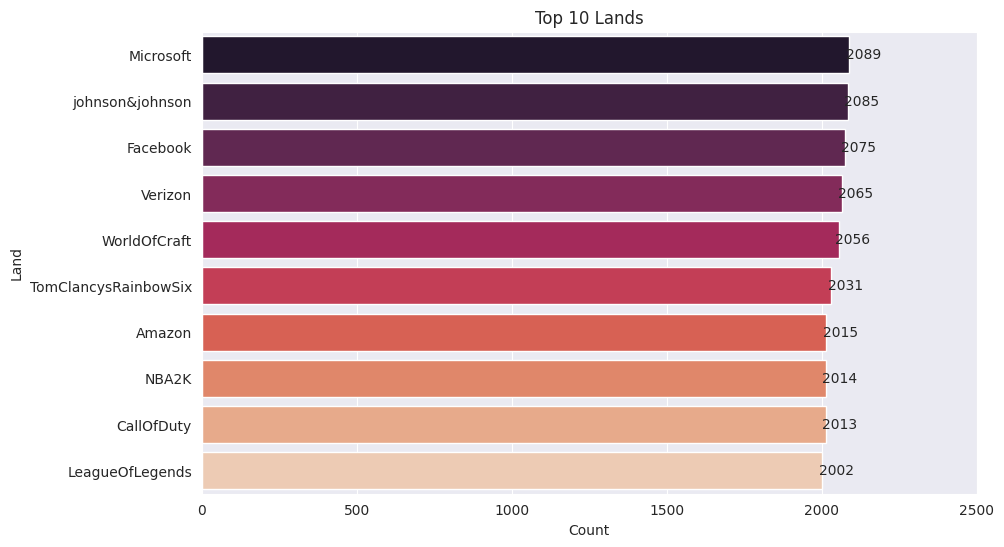

In [60]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=lands.values[:10], y=lands.index[:10], palette='rocket')
for p in bar.patches:
    bar.annotate(format(p.get_width(), '.0f'),
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha = 'center', va = 'center',
                 xytext = (10, 0),
                 textcoords = 'offset points')
plt.title('Top 10 Lands')
plt.xlabel('Count')
plt.ylabel('Land')
plt.xlim(0, 2500)
plt.show()

Column Mode , which consists of 4 modes as : Positive ,Neutral ,Negative and Irrelevant
Negative with highest common reviws : 21698
Positive the second : 19712
Neutral the third : 17708
Irrelevant : 12537


In [61]:
print(f'The unique values of Mode : {len(df.Mode.unique())}')
print('**' * 20)
print(df.Mode.unique())

The unique values of Mode : 4
****************************************
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [62]:
mode = df.Mode.value_counts()
mode.to_frame().T

,Negative,Positive,Neutral,Irrelevant
Mode,19146,16970,15888,11042


We use mode.index instead of mode.keys() to access the index (sentiment categories) of the mode Series.
We use sns.color_palette("rocket") to get a color palette from Seaborn named "rocket".
custom_colors is a list containing custom colors you want to use for the pie chart. You can specify your desired colors in hexadecimal format or use any other valid color specification.
When plotting the pie chart, you pass custom_colors to the colors parameter to use your custom color palette.


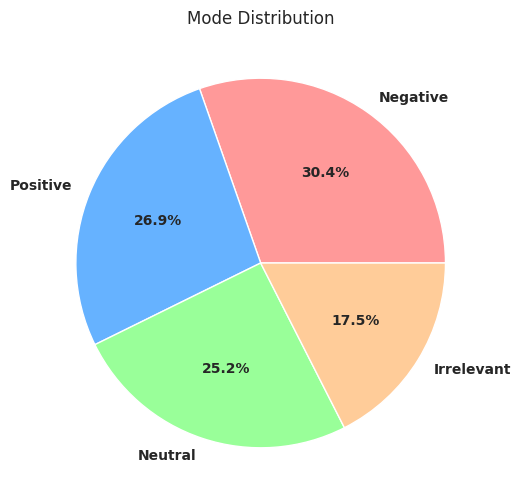

In [63]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(6, 6))
plt.pie(x=mode.values, labels=mode.index, autopct="%1.1f%%",
        textprops={"fontsize": 10, "fontweight": "black"}, colors=custom_colors)
plt.title('Mode Distribution')
plt.show()

We can also take a look at each land with its mode and scan them

In [64]:
pd.crosstab(df.Mode , df.Land).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')

Mode,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,163,495,1105,252
ApexLegends,161,507,768,498
AssassinsCreed,232,319,131,1210
Battlefield,798,392,282,477
Borderlands,216,386,526,865
CS-GO,550,299,477,616
CallOfDuty,565,751,336,361
CallOfDutyBlackopsColdWar,453,445,305,676
Cyberpunk2077,393,315,412,769


1. Handling grammatical problems and verbal expressions: The re library in Python can be used to perform text pattern matching and manipulation. This can include replacing grammatically incorrect phrases or verbal expressions with correct ones.

2. Dealing with emojis: Emojis are symbols used to convey emotions or sentiments in text. In text preprocessing, you may choose to replace emojis with their textual descriptions or simply remove them if they are not relevant to the analysis.

3. Consideration of emojis in sentiment analysis: Emojis can provide valuable information about the sentiment or emotion expressed in text data. Therefore, it's important to consider them in sentiment analysis tasks, as they can influence the classification of text into different sentiment classes.

4. Handling punctuation: Punctuation marks can be normalized by replacing multiple occurrences of allowed punctuation marks with just one occurrence. This helps in standardizing the text and avoiding noise in the data.

5. Lowercasing and whitespace normalization: Text is converted to lowercase to ensure consistency in text processing. Additionally, multiple consecutive spaces are replaced with a single space to maintain uniformity in text formatting.

In [65]:
def clean_emoji(tx):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', tx)
def text_cleaner(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text

Before applying text preprocessing steps to the entire dataset, the user wants to explore and test out some common methods typically used in natural language processing (NLP). To do this, they plan to select a random example from the dataset and apply their text cleaning function to it.



In [66]:
random.seed(99)
test_text =text_cleaner( random.choice(df['Text']))
test_text = clean_emoji(test_text)
test_text

'assassin creed ezio colletct cant seem quit enjoy third game alt ly 3jstdu5'

Parts of Speech

Understanding parts of speech (POS) is like knowing the job of each word in a sentence. For example, nouns name things, verbs show actions, and adjectives describe things. It's important in NLP because it helps us understand the meaning of words in sentences and how they work together.

Spacy is a helpful tool for NLP tasks, and it has features to identify parts of speech in text. You can use it to analyze text and see which words are nouns, verbs, adjectives, etc.

By using Spacy, you can process a piece of text and see which words play which roles in the sentence. This helps with tasks like understanding language, text analysis, and building language models.


In [67]:
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.pos_}')

assassin => PROPN
creed => PROPN
ezio => PROPN
colletct => NOUN
ca => AUX
nt => PART
seem => VERB
quit => ADJ
enjoy => VERB
third => ADJ
game => NOUN
alt => INTJ
ly => X
3jstdu5 => NUM


Named Entity Recognition

Named Entity Recognition (NER) is like a magic trick for computers to pick out important pieces of information from a bunch of text. Imagine you have a big block of text, and you want to quickly find out things like names of people, names of companies, locations, dates, and other important stuff without reading through it all yourself. NER does that job for you!

For example, if you feed a news article into a NER system, it can automatically spot and highlight things like the name of the president, the name of the company being discussed, the locations mentioned, and any specific dates mentioned in the article.

It's really handy because it saves a lot of time. Instead of spending hours reading through text, you can let the computer do the heavy lifting and pick out the important bits for you. This makes it super useful for processing large amounts of text quickly and efficiently.









In [68]:
doc = nlp(test_text)
for chunk in doc.ents:
    print(f'{chunk} => {chunk.label_}')

assassin => ORG
ezio colletct => PERSON
third => ORDINAL
3jstdu5 => CARDINAL


Chunking is like breaking down a big block of text into smaller, more manageable pieces so we can understand it better. It's a process of grouping together words that belong to similar categories or have similar meanings.

For example, imagine you have a sentence like "The big brown dog chased the cat." With chunking, we can break this sentence down into chunks like "the big brown dog" (which is a noun phrase or NP) and "chased the cat" (which is a verb phrase or VP).

Chunking helps us understand the structure of sentences better and makes it easier to analyze and process large amounts of text. It's like organizing the words into neat little groups so we can make sense of them more easily.

In [69]:
doc = nlp(test_text)
for chunk in doc.noun_chunks:
    print(f'{chunk} => {chunk.label_}')

assassin creed ezio colletct => NP
third game => NP


Tokenization is like breaking down a block of text into smaller chunks called tokens, which makes it easier for computers to analyze human language. Each token represents a single word or part of a word.

For example, if you have the sentence "The cat is sleeping", tokenization would break it down into tokens like "The", "cat", "is", and "sleeping".

There are different types of tokenization methods, and one of them is Regexp Tokenization. This method uses regular expressions to define how to split a string into tokens. In this case, the text is split based on spaces, so each word becomes a separate token.

Regexp Tokenization is useful for handling text data where words are separated by spaces, but other tokenization methods may be used for different types of text, such as Tweet Tokenization for handling tweets with hashtags and mentions.



In [70]:
Tokenizer=RegexpTokenizer(r'\w+')
test_text_tokenized = Tokenizer.tokenize(test_text)
test_text_tokenized

['assassin',
 'creed',
 'ezio',
 'colletct',
 'cant',
 'seem',
 'quit',
 'enjoy',
 'third',
 'game',
 'alt',
 'ly',
 '3jstdu5']

CountVectorizer is like a tool that converts text documents into numbers. It counts how many times each word appears in a document and represents this as a vector. Each element in the vector corresponds to the count of a specific word in the document.

For example, let's say we have a sentence like "The cat is sleeping. The dog is playing." CountVectorizer would convert this into a vector where "the" appears twice, "cat", "is", "sleeping", "dog", and "playing" each appear once. So, the vector would look something like [2, 1, 2, 1, 1, 1].

This is useful because it allows us to represent text data in a format that machine learning models can understand. We can then use these vectors as input to train models for tasks like classification or clustering.

To visualize how CountVectorizer works, we can create a heatmap chart where each row represents a document, and each column represents a word. The value in each cell indicates how many times the corresponding word appears in the document. This helps us see the patterns and frequencies of words in the text data.







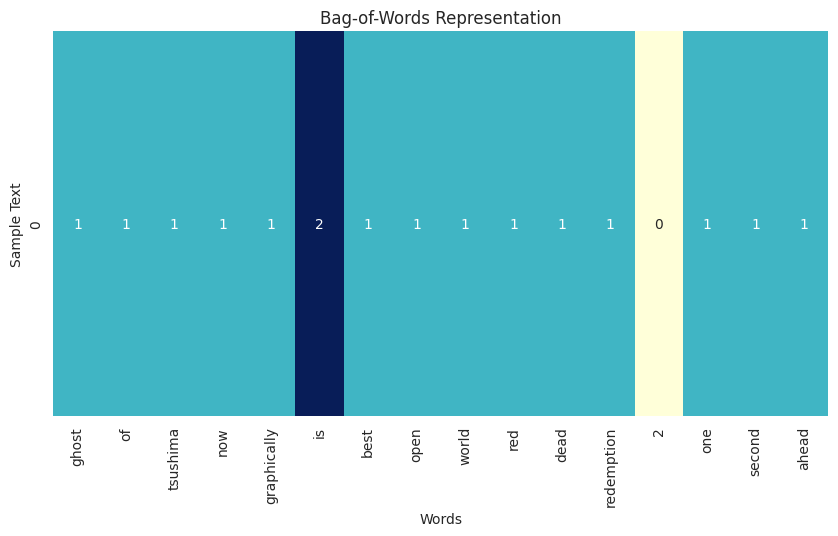

In [71]:
words = ['ghost', 'of', 'tsushima', 'now', 'graphically', 'is', 'best', 'open', 'world', 'red', 'dead', 'redemption', '2', 'one', 'second', 'ahead']
test_text = 'ghost of tsushima is now graphically the best open world. red dead redemption 2 is one second ahead.'

# Create CountVectorizer
counter_vectorizer = CountVectorizer(vocabulary=words)
transform = counter_vectorizer.fit_transform([test_text]).toarray()

# Visualize bag-of-words matrix
plt.figure(figsize=(10, 5))
sns.heatmap(transform, annot=True, xticklabels=words, cbar=False, cmap='YlGnBu')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Sample Text')
plt.show()

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a technique used to evaluate the importance of words in a document relative to a collection of documents, called a corpus.

Here's a simple breakdown of how TF-IDF works:

1. Term Frequency (TF): This part measures how often a word appears in a document. It's calculated by dividing the number of times a word appears in a document by the total number of words in that document. Essentially, it indicates the importance of a word within the document.

2. Inverse Document Frequency (IDF): This part measures how common or rare a word is across all documents in the corpus. It's calculated by taking the logarithm of the total number of documents in the corpus divided by the number of documents containing the word. The IDF score is higher for words that are less common across documents and lower for words that are common.

3. Combining TF and IDF: The TF and IDF scores are then multiplied together to get the TF-IDF score for each word. This score indicates the importance of the word in the document relative to the entire corpus.

The resulting TF-IDF score for each word is a number between 0 and 1. A higher TF-IDF score means the word is more important or relevant to the document, while a lower score means it's less important.

TF-IDF is commonly used in various NLP tasks such as information retrieval, document classification, and text mining. It helps identify the most significant words in a document or a corpus by considering both their frequency within the document and their rarity across the corpus.








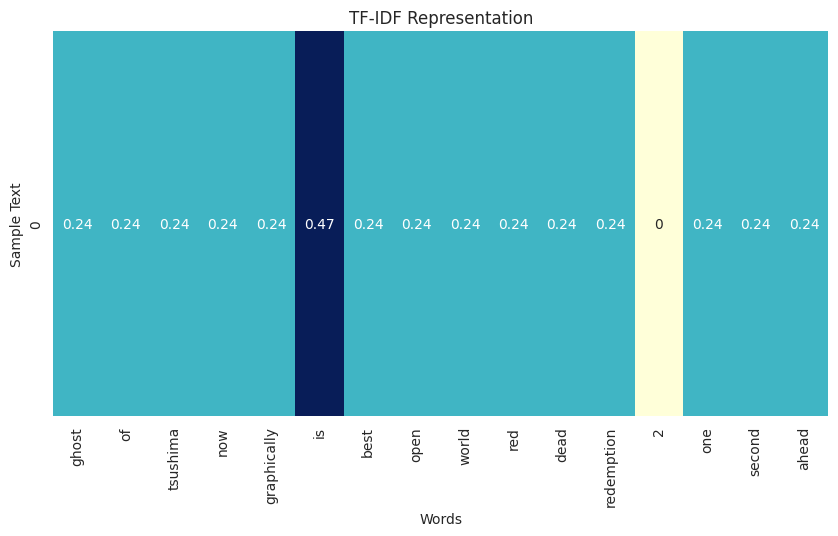

In [72]:
words = ['ghost', 'of', 'tsushima', 'now', 'graphically', 'is', 'best', 'open', 'world', 'red', 'dead', 'redemption', '2', 'one', 'second', 'ahead']
test_text = 'ghost of tsushima is now graphically the best open world. red dead redemption 2 is one second ahead.'

# Create TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=words)
transform = tfidf_vectorizer.fit_transform([test_text]).toarray()

# Visualize TF-IDF matrix
plt.figure(figsize=(10, 5))
sns.heatmap(transform, annot=True, xticklabels=words, cbar=False, cmap='YlGnBu')
plt.title('TF-IDF Representation')
plt.xlabel('Words')
plt.ylabel('Sample Text')
plt.show()

In simple terms, N-grams are sequences of N words or tokens in a text document. They represent a collection of N successive items, which can include words, numbers, symbols, and punctuation.

For example:

1. A 2-gram (also known as bigram) consists of two words or tokens.
2. A 3-gram (also known as trigram) consists of three words or tokens.
And so on for higher values of N.

Each N-gram captures a sequence of words in the text, allowing us to analyze the text in chunks rather than individual words. This can be helpful for tasks like language modeling, where we want to predict the next word in a sequence based on the previous words.

For instance, in the sentence "The cat is sleeping", the 2-grams (bigrams) would be:

1. "The cat"
2. "cat is"
3. "is sleeping"

And the 3-grams (trigrams) would be:

1. "The cat is"
2. "cat is sleeping"

N-grams are commonly used in natural language processing tasks such as text generation, machine translation, and sentiment analysis, as they capture the contextual information and dependencies between words in a text.

In [73]:
def n_grams(text, n):

    return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = test_text_tokenized
n_grams(cleaned, 3)

[['assassin', 'creed', 'ezio'],
 ['creed', 'ezio', 'colletct'],
 ['ezio', 'colletct', 'cant'],
 ['colletct', 'cant', 'seem'],
 ['cant', 'seem', 'quit'],
 ['seem', 'quit', 'enjoy'],
 ['quit', 'enjoy', 'third'],
 ['enjoy', 'third', 'game'],
 ['third', 'game', 'alt'],
 ['game', 'alt', 'ly'],
 ['alt', 'ly', '3jstdu5']]

Stop words are common words in a language that are often removed from text during natural language processing tasks. These words are considered to have little or no significance in determining the meaning of a sentence. Examples of stop words in English include "the", "is", "and", "of", "in", etc.



In [74]:
stopwords_list = stopwords.words('english')
print(f'There are {len(stopwords_list) } stop words')
print('**' * 20 , '\n20 of them are as follows:\n')
for inx , value in enumerate(stopwords_list[:20]):
    print(f'{inx+1}:{value}')

There are 179 stop words
**************************************** 
20 of them are as follows:

1:i
2:me
3:my
4:myself
5:we
6:our
7:ours
8:ourselves
9:you
10:you're
11:you've
12:you'll
13:you'd
14:your
15:yours
16:yourself
17:yourselves
18:he
19:him
20:his


You're analyzing how punctuation marks are used in different "modes of views". You:

1. Read words from each sample for each mode.
2. Count the occurrences of each punctuation mark.
3. Sort the counts to find the most common punctuation marks.
4. Show the distribution using a bar chart.
5. Notice that certain punctuation marks, like ",", "to", "and", and "a", appear frequently across all modes.






In [75]:
def make_corpus(kind):
    corpus = []
    for text in df.loc[df['Mode']==kind]['Text'].str.split():
        for word in text:
            corpus.append(word)
    return corpus

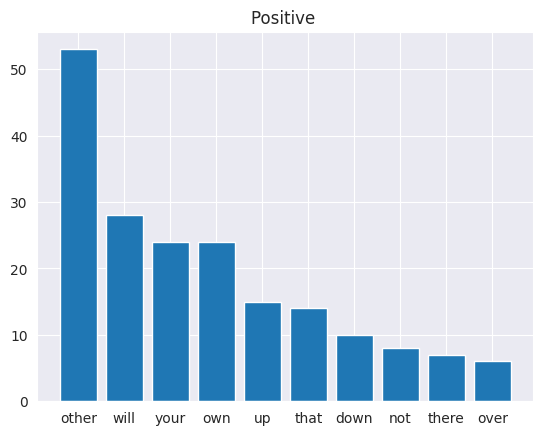

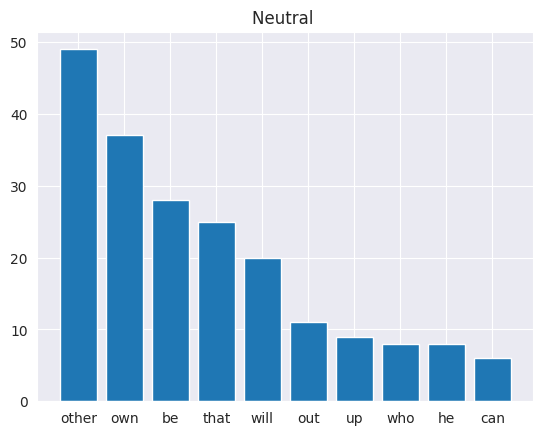

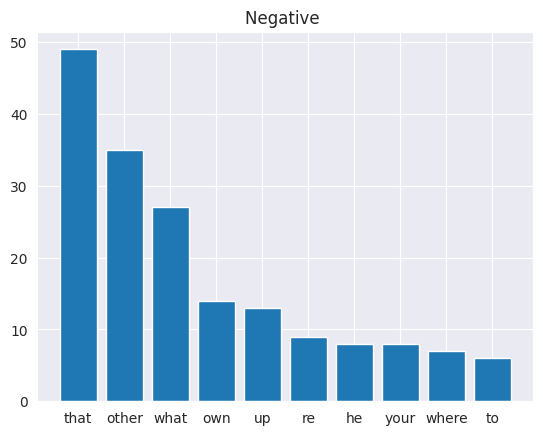

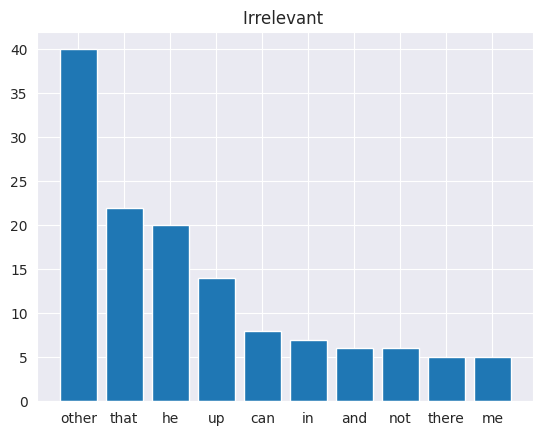

In [76]:
stop = stopwords.words('english')
sentiments = list(df.Mode.unique())

for inx , value in enumerate(sentiments):
    corpus = make_corpus(value)
    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

    x, y = zip(*top)
    plt.title(f'{value} ')
    plt.bar(x , y)
    plt.show()


You're applying text cleaning techniques to the dataset using a function called "text_clearer". Then, you're tokenizing the cleaned text. This prepares the data for further analysis.
This likely involves removing unnecessary characters, converting text to lowercase, and handling other text-related issues to make the data more consistent and easier to work with.








In [77]:
df['Text'] = df['Text'].apply(lambda x : text_cleaner(x))
df['Text']= df['Text'].apply(lambda x : Tokenizer.tokenize(x))
df['Text'].to_frame()

,Text
0,"[im, get, borderland, murder]"
1,"[come, border, kill]"
2,"[im, get, borderland, kill]"
3,"[im, come, borderland, murder]"
4,"[im, get, borderland, 2, murder]"
...,...
74676,"[realiz, window, partit, mac, like, 6, year, b..."
74678,"[realiz, mac, window, partit, 6, year, behind,..."
74679,"[realiz, window, partit, mac, 6, year, behind,..."
74680,"[realiz, window, partit, mac, like, 6, year, b..."


In simple terms, both Lemmatization and Stemming are techniques used in natural language processing (NLP) to reduce words to their base or root forms. Here's a breakdown of the two:

Lemmatization:

1. Lemmatization breaks down a word to its root meaning to identify similarities.
2. For example, it would reduce words like "better" to its root word "good".
3. It's more accurate than stemming because it brings a word to the language root, making it readable for humans.
4. It's slightly slower compared to stemming.

Stemming:

1. Stemming also reduces words to their base form, known as the stem.
However, the resulting stem may not always be a real word.
2. Stemming is faster and suitable for large datasets.
3. It's less accurate than lemmatization because it may not always produce real words.

In [78]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.lemma_}')

ghost => ghost
of => of
tsushima => tsushima
is => be
now => now
graphically => graphically
the => the
best => well
open => open
world => world
. => .
red => red
dead => dead
redemption => redemption
2 => 2
is => be
one => one
second => second
ahead => ahead
. => .


In [79]:
# lemmatizer = WordNetLemmatizer()
Stemmer = PorterStemmer()
def stopwords_cleaner(text):
#     word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting
df['Text'] = df['Text'].apply(lambda x : stopwords_cleaner(x))
# stopwords_cleaner(Tokenizer.tokenize(df.Text[100]))

In [80]:
df['Text'][:10].to_frame()

,Text
0,im get borderland murder
1,come border kill
2,im get borderland kill
3,im come borderland murder
4,im get borderland 2 murder
6,spent hour make someth fun know huge borderlan...
7,spent coupl hour someth fun know huge borderla...
8,spent hour someth fun know huge borderland fan...
9,spent hour make someth fun know huge rhandlerr...
10,2010 spent hour make someth fun know huge rhan...


Word Cloud

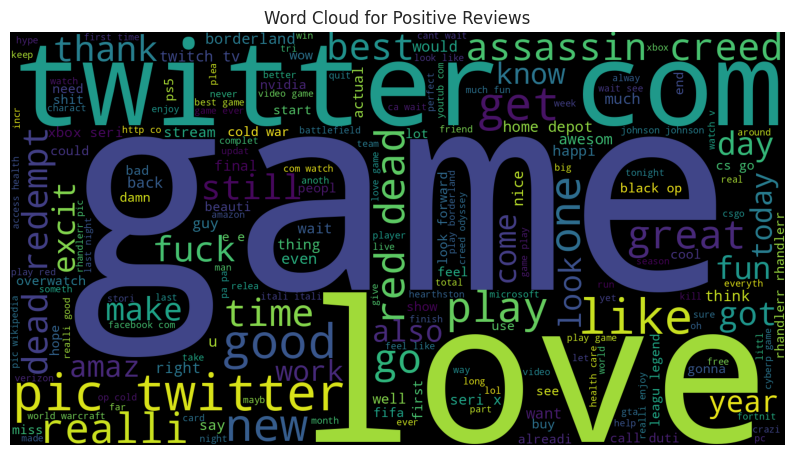

In [81]:
positive_reviews = df[df['Mode'] == 'Positive']['Text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

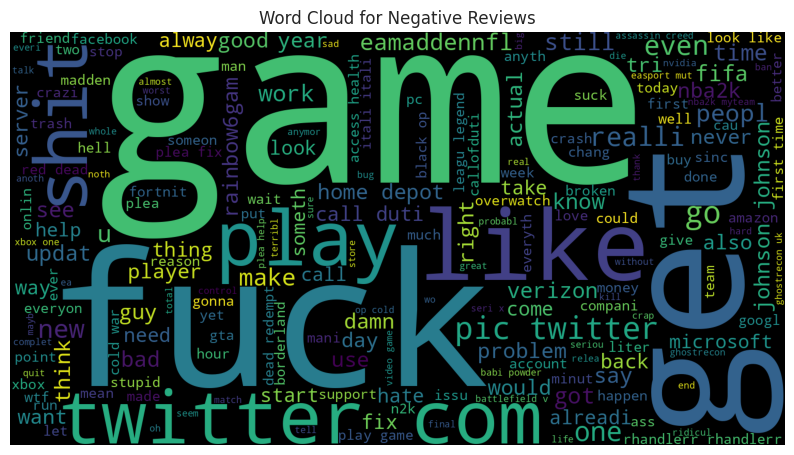

In [82]:
positive_reviews = df[df['Mode'] == 'Negative']['Text']
neg = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(neg)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

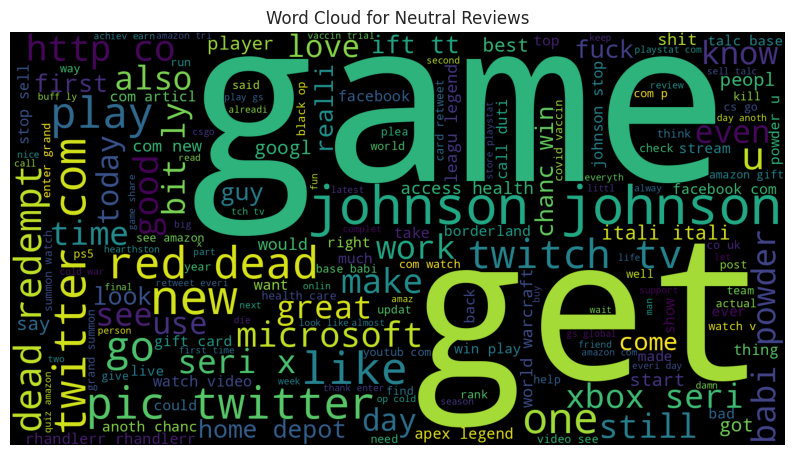

In [83]:
positive_reviews = df[df['Mode'] == 'Neutral']['Text']
Neutral = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Neutral)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')
plt.show()

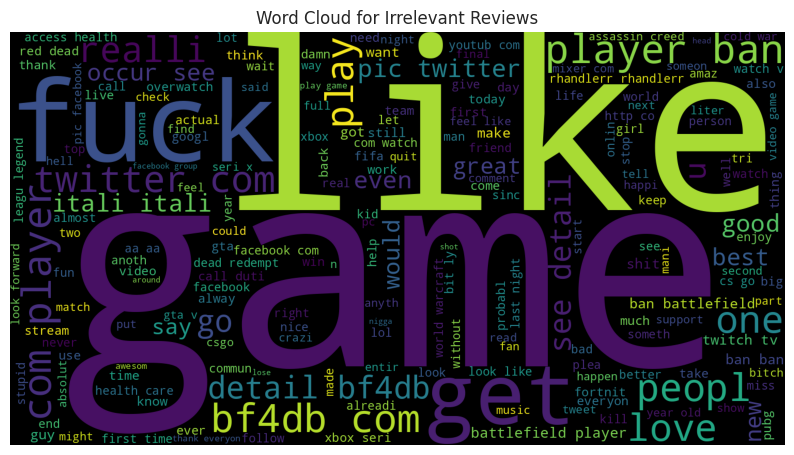

In [84]:
positive_reviews = df[df['Mode'] == 'Irrelevant']['Text']
Irrelevant  = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Irrelevant )
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Irrelevant Reviews')
plt.axis('off')
plt.show()

In simple terms, we're calculating some basic statistics to understand our dataset better. Here's what we're looking at:

1. Maximum and Minimum Length of Texts: Finding the longest and shortest text lengths in our dataset helps us understand the range of text lengths we're dealing with.

2. Mean and Standard Deviation of Length: Calculating the average length of texts and how much they vary from this average gives us an idea of the typical length and spread of our texts.

3. Number of Words to Keep for Each Sample: Instead of using all words in each text (which can be computationally expensive and may not improve model learning), we want to limit the number of words. To do this, we use a formula based on the mean and standard deviation to keep 95% of the data while reducing the amount of data for better learning. In this case, we're keeping 166 words for each sample, using the special character PAD for any additional words to ensure all samples have the same length.



In [85]:
len_text = [len(tx) for tx in df['Text'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

Max Length : 797
Min Length : 0
Mean Length : 71.56
Std Length : 49.13
Mew + 2sigma : 169.81


Now , after removing all stop words we want to see what words are most common for each mode in our corpus.

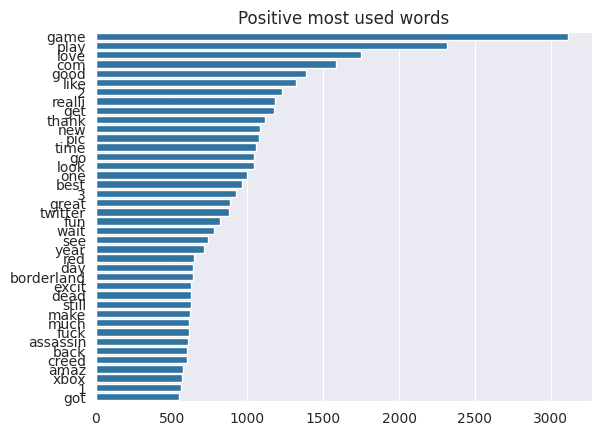

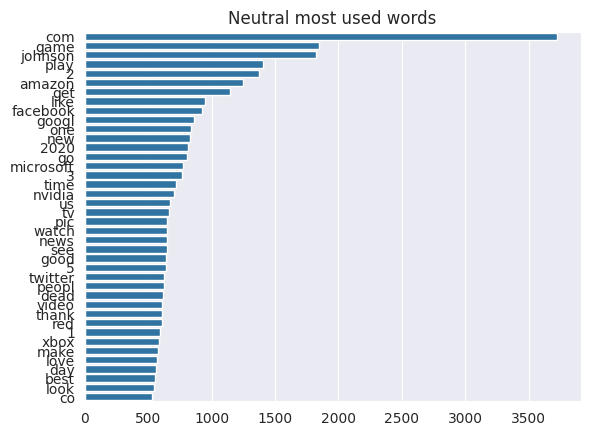

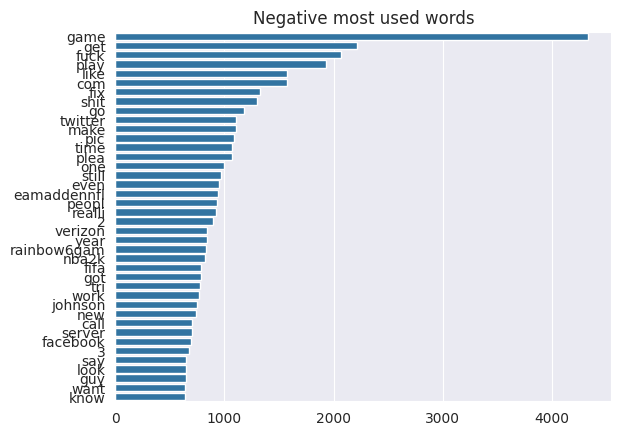

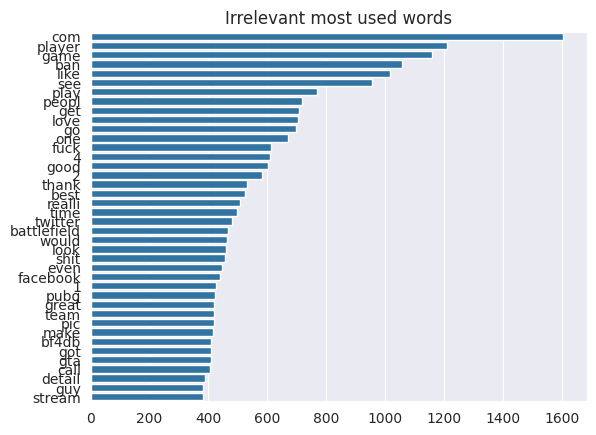

In [86]:
for inx , value in enumerate(sentiments):

    counter = Counter(make_corpus(value))
    most_common = counter.most_common()

    x = []
    y = []

    for word, count in most_common[:40]:
         if word not in stop:
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, orient='h')
    plt.title(f'{value} most used words')
    plt.show()

In simple terms, we're creating a new column called "sentiments" in our dataset. Instead of labeling sentiments as "Positive", "Negative", "Neutral", or "Irrelevant", we're assigning numerical values: 1 for Positive, 0 for Negative, and 2 for Neutral or Irrelevant.

Here's why:

1. We want to focus on accurately identifying Positive and Negative reviews, as they are more important to us than Neutral or Irrelevant ones.
2. By reducing the number of classes to three (Positive, Negative, and Neutral/Irrelevant), we aim to improve the accuracy of our sentiment classification model.

3. While we could classify each sentiment separately, it may lead to decreased accuracy, so we're simplifying the classification to prioritize accuracy in identifying Positive and Negative sentiments.


In [87]:
df['sentiments'] = df['Mode'].replace({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [88]:
df.sample(10)

,Index,Land,Mode,Text,sentiments
40954,1428,Battlefield,Irrelevant,ban battlefield fantasi 4 player sasobyt occur...,2
63706,7717,MaddenNFL,Positive,dylan mark cole list 71 ovr contend madden nfl...,1
41956,1598,Battlefield,Negative,fuck nobodi play silver rush battlefield 4 ps4,0
35262,8057,Microsoft,Negative,ca renam privat field updat issu 9 31 56 pm gi...,0
64595,7865,MaddenNFL,Neutral,madden nfl 10 playstat 4 9 great offer 95 ebay...,2
69510,3910,Cyberpunk2077,Irrelevant,sivhdtweet good gamer love,2
58323,11599,TomClancysRainbowSix,Neutral,type person need ban insan toxic whole game ca...,2
36694,8295,Microsoft,Neutral,huge radio play reinvent corpor evolut histori...,2
68702,3764,Cyberpunk2077,Neutral,free p 2077 stik bagh germani youtu rsht9rgg,2
59389,3379,Facebook,Neutral,thank continu support let rock happi 400 follo...,2


Now , we are going to create a customer class to show len and item.


In [89]:
class Dataset:
    def __init__(self,text,sentiment):
        self.text = text
        self.sentiment = sentiment

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = self.text[item,:]
        target = self.sentiment[item]
        return {
            "text": torch.tensor(text,dtype = torch.long),
            "target": torch.tensor(target,dtype = torch.long)
        }

Reading Word Vectors: We have word vectors that help our model understand the meaning of words in our dataset. We're using the GloVe word vectors, specifically the glove.6B.300d version, which has 300 dimensions. More dimensions generally mean better understanding, but it can be more computationally intensive.

Creating Embedding Matrix: We also need a function to create an embedding matrix for the words in our corpus. This matrix will contain the word vectors for each word in our dataset, allowing our model to learn from the contextual meanings of words.



In [90]:
def load_vectors(fname):
    fin = open(fname , encoding="utf8")
    data = {}
    for line in fin:
        tokens = line.split()
        data[tokens[0]] = np.array([float(value) for value in tokens[1:]])

    return data

In [91]:
def create_embedding_matrix(word_index,embedding_dict):

    embedding_matrix = np.zeros((len(word_index)+1,300))
    for word, i in word_index.items():
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]

    return embedding_matrix

### **Model Development - (Bi-LSTM)**

Bidirectional LSTM (BiLSTM) is a recurrent neural network used primarily on natural language processing. Unlike standard LSTM, the input flows in both directions, and it’s capable of utilizing information from both sides. It’s also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence.

In summary, BiLSTM adds one more LSTM layer, which reverses the direction of information flow. Briefly, it means that the input sequence flows backward in the additional LSTM layer. Then we combine the outputs from both LSTM layers in several ways, such as average, sum, multiplication, or concatenation.



In [92]:
class sentimentBiLSTM(nn.Module):
#inherited from nn.Module

    def __init__(self, embedding_matrix, hidden_dim, output_size):

        #initializing the params by initialization method
        super(sentimentBiLSTM, self).__init__()
        self.embedding_matrix = embedding_matrix
        self.hidden_dim = hidden_dim
        num_words = self.embedding_matrix.shape[0]
        embed_dim = self.embedding_matrix.shape[1]
        # craetinh embedding layer
        self.embedding = nn.Embedding(num_embeddings=num_words,embedding_dim=embed_dim)

        ## initializes the weights of the embedding layer to the pretrained embeddings in
        ## embedding_matrix. It first converts embedding_matrix to a PyTorch tensor and
        ## wraps it in an nn.Parameter object, which makes it a learnable parameter of the model.
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_dim,hidden_dim,bidirectional=True,batch_first=True)

        #it is multuplied by 2 becuase it is bi_directional if one-sided it didnt need.
        self.fc = nn.Linear(hidden_dim*2, output_size)


    #we need a forward function to model calculate the cost and know how bad the params is .
    # However , it can be written in a line of code but if we want to track it it is easier way.
    def forward(self, x):


        embeds = self.embedding(x)
        lstm_out,_ = self.lstm(embeds)
        lstm_out = lstm_out[:, -1]
        out = self.fc(lstm_out)

        return out

Spliting data to train and test => 80% for train and 20% for test


In [93]:
y = df.sentiments.values
train_df,test_df = train_test_split(df,test_size = 0.2, stratify = y)

Max Length: By setting a maximum length for our sequences, we control the size of our input data, making it manageable for our model while preserving important information.

Batch Size: The batch size determines how many samples are processed simultaneously during training. Larger batch sizes can lead to faster training, but they require more memory. We choose common values like 16, 32, or 64 based on typical system capabilities.

Hidden Dimension: The hidden dimension determines the complexity of our model. A higher hidden dimension allows the model to learn more complex patterns in the data, potentially leading to better performance. We choose 64 as a balance between model complexity and computational efficiency.

Output Classes: The number of output classes is determined by the categories in our dataset. Each class represents a different sentiment or category that our model will predict.

GPU or CPU: We use the GPU for training if available because it accelerates computations, significantly reducing training time. However, if a GPU is not available, we fall back to using the CPU to ensure our model can still be trained effectively.

In [94]:
MAX_LEN = 167
BATCH_SIZE = 32
hidden_dim = 64
output_size = 3


if torch.cuda.is_available():

       device = torch.device("cuda")

else:
       device = torch.device("cpu")


print(f'Current device is {device}')

Current device is cuda


We're making sure each sample has a maximum of 167 words.
If a sample has more words, we're replacing the extra ones with a special character called PAD.
Then, we're using a DataLoader to organize and load our data efficiently for both training and testing.






In [95]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.Text.values.tolist())

xtrain = tokenizer.texts_to_sequences(train_df.Text.values)
xtest = tokenizer.texts_to_sequences(test_df.Text.values)
xtrain = tf.keras.preprocessing.sequence.pad_sequences(xtrain,maxlen = MAX_LEN)
xtest = tf.keras.preprocessing.sequence.pad_sequences(xtest,maxlen = MAX_LEN)
train_dataset = Dataset(text=xtrain,sentiment=train_df.sentiments.values)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,drop_last=True)
valid_dataset = Dataset(text=xtest,sentiment=test_df.sentiments.values)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size=BATCH_SIZE,drop_last=True)

In [96]:
one_batch = next(iter(train_loader))
one_batch


{'text': tensor([[    0,     0,     0,  ...,     2,  4538, 12494],
         [    0,     0,     0,  ...,   373,   133,   368],
         [    0,     0,     0,  ...,    45,    64,    79],
         ...,
         [    0,     0,     0,  ...,   180,   136, 17808],
         [    0,     0,     0,  ...,   810,   311,  1562],
         [    0,     0,     0,  ...,    14,     2, 17919]]),
 'target': tensor([2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2,
         1, 2, 2, 2, 0, 1, 1, 1])}

We load and tokenize GloVe word vectors to provide our model with pre-trained word embeddings, helping it understand word meanings and relationships. This saves time, improves performance, and allows our model to generalize better to new data.

In [97]:
embedding_dict = load_vectors('/content/drive/MyDrive/Data/Twitter/glove.6B.300d.txt')
embedding_matrix = create_embedding_matrix(tokenizer.word_index,embedding_dict)

We create a model object with the following specifications: embedding matrix, hidden dimension of 64, and output size of 3 (for the number of classes). Then, we put the model on the device (GPU if available, otherwise CPU) for training and inference.

In [98]:
model = sentimentBiLSTM(embedding_matrix, hidden_dim, output_size)
model = model.to(device)
print(model)

sentimentBiLSTM(
  (embedding): Embedding(23441, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


We set the manual seed for reproducibility, choose Adam optimizer with a learning rate of 0.001, and use CrossEntropyLoss as the cost function since we have three classes. We define an accuracy function to evaluate model performance. The number of epochs is set to 9.

In [99]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
# schedul_learning = torch.optim.lr_scheduler.MultiStepLR(optimizer=optimizer , milestones=[6] ,
#                                                         gamma=0.055)

def acc(pred,label):
    pred = pred.argmax(1)
    return torch.sum(pred == label.squeeze()).item()

In [100]:
clip = 5
epochs = 9
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    # for getting loss and accuracy for train
    train_losses = []
    train_acc = 0.0

    #put model on train mode
    model.train()
    correct = 0

    # initialize hidden state
    for data in train_loader:

        #get text and target
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)

         #gradient becomes zero=> avoid accumulating
        model.zero_grad()
        output = model(inputs)
          # calculate the loss and perform backprop
        loss = criterion(output, labels.long())
        loss.backward()
        train_losses.append(loss.item())
        # accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in LSTMs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    # for getting loss and accuracy for valiadtion
    val_losses = []
    val_acc = 0.0

    #put model on evaluation mode
    model.eval()
    for data in valid_loader:

        #get text and target
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)

        #gradient becomes zero=> avoid accumulating
        model.zero_grad()
        output = model(inputs)

        output = model(inputs)
        #Loss calculating
        val_loss = criterion(output, labels.long())
        #append Loss to the above list
        val_losses.append(val_loss.item())

        # calculating accuracy
        accuracy = acc(output,labels)
        val_acc += accuracy
        epoch_train_loss = np.mean(train_losses)

        #using schedule lr if you need
#         schedul_learning.step()
#         schedul_learning

    #appending all accuracy and loss to the above lists and variables
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        #each time that model(params) get better you can save the model(you have to enter a path ou you pc and save with pt file)
        # torch.save(model.state_dict(), r'C:\Users\payama\Desktop\Projects kaggle\NLP\vectors features\BidirectionalLSTM.pt')
        # print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        print(f'Validation loss decreased ({valid_loss_min} --> {epoch_val_loss})  Saving model ...')
        # save model if better result happends
        valid_loss_min = epoch_val_loss
    print(30 * '==' , '>')

Epoch 1
train_loss : 0.8740758729276016 val_loss : 0.8071939504237344
train_accuracy : 58.486002062019196 val_accuracy : 63.90166534496431
Validation loss decreased (inf --> 0.8071939504237344)  Saving model ...
============================================================ >
Epoch 2
train_loss : 0.7012813546822458 val_loss : 0.7036432663196235
train_accuracy : 68.99238639067333 val_accuracy : 69.53211736716891
Validation loss decreased (0.8071939504237344 --> 0.7036432663196235)  Saving model ...
============================================================ >
Epoch 3
train_loss : 0.5699502862989902 val_loss : 0.6417441650241764
train_accuracy : 75.9358394797367 val_accuracy : 73.00555114988104
Validation loss decreased (0.7036432663196235 --> 0.6417441650241764)  Saving model ...
============================================================ >
Epoch 4
train_loss : 0.4463678563987543 val_loss : 0.5988188003979359
train_accuracy : 81.60242683797287 val_accuracy : 76.13798572561458
Validation

### **Result - (Bi-LSTM)**

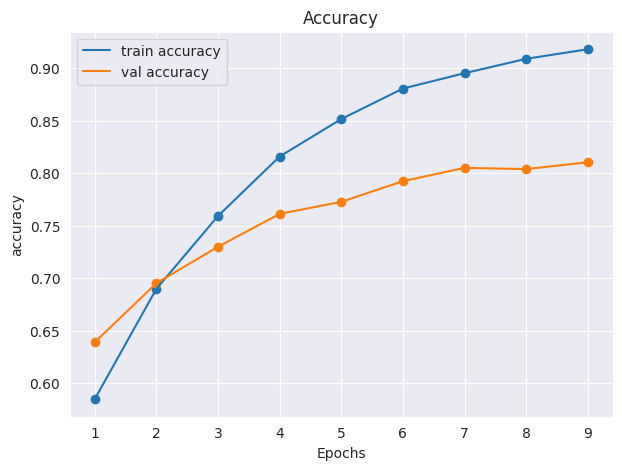

In [101]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),epoch_tr_acc , label='train accuracy')
plt.scatter(range(1,10),epoch_tr_acc)
plt.plot(range(1,10),epoch_vl_acc , label='val accuracy')
plt.scatter(range(1,10),epoch_vl_acc)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

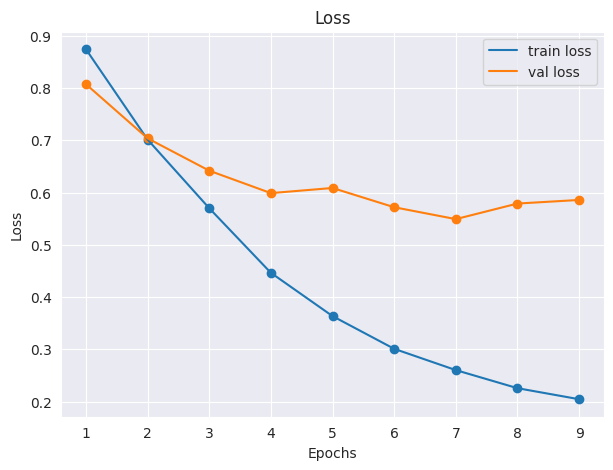

In [102]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),epoch_tr_loss , label='train loss')
plt.scatter(range(1,10),epoch_tr_loss )
plt.plot(range(1,10),epoch_vl_loss , label='val loss')
plt.scatter(range(1,10),epoch_vl_loss)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **DCNN**

In [103]:
class SentimentDCNN(nn.Module):
    def __init__(self, embedding_matrix, num_filters, filter_sizes, output_size, dropout):
        super(SentimentDCNN, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # Freeze embedding weights

        # Convolutional layers
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_matrix.shape[1], out_channels=num_filters, kernel_size=fs)
            for fs in filter_sizes
        ])

        # Fully connected layer
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_size)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Embedding layer
        embedded = self.embedding(x)  # [batch_size, seq_len, embedding_dim]
        embedded = embedded.permute(0, 2, 1)  # [batch_size, embedding_dim, seq_len]

        # Convolutional and pooling layers
        conv_outputs = []
        for conv in self.convs:
            conv_out = torch.relu(conv(embedded))  # [batch_size, num_filters, seq_len - filter_size + 1]
            pooled_out = torch.max(conv_out, dim=2)[0]  # Max pooling over time
            conv_outputs.append(pooled_out)
        combined_out = torch.cat(conv_outputs, dim=1)  # [batch_size, num_filters * len(filter_sizes)]

        # Dropout
        combined_out = self.dropout(combined_out)

        # Fully connected layer
        logits = self.fc(combined_out)  # [batch_size, output_size]

        return logits

In [104]:
# Define the DCNN model
dcnn_model = SentimentDCNN(embedding_matrix=embedding_matrix,
                            num_filters=100,
                            filter_sizes=[3, 4, 5],
                            output_size=output_size,
                            dropout=0.5)
dcnn_model = dcnn_model.to(device)

# Define optimizer and loss function
optimizer = optim.Adam(dcnn_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
valid_loss_min = np.Inf

for epoch in range(epochs):
    # Train the model
    dcnn_model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for data in train_loader:
        inputs, labels = data['text'].to(device), data['target'].to(device)
        optimizer.zero_grad()
        outputs = dcnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    # Validate the model
    dcnn_model.eval()
    valid_loss = 0.0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():
        for data in valid_loader:
            inputs, labels = data['text'].to(device), data['target'].to(device)
            outputs = dcnn_model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_valid += (predicted == labels).sum().item()
            total_valid += labels.size(0)

    # Calculate average losses and accuracies
    train_loss = train_loss / len(train_loader.dataset)
    valid_loss = valid_loss / len(valid_loader.dataset)
    train_accuracy = correct_train / total_train
    valid_accuracy = correct_valid / total_valid

    # Save losses and accuracies for plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    # Print epoch statistics
    print(f'Epoch {epoch + 1}/{epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

    # Check for improvement in validation loss
    if valid_loss < valid_loss_min:
        print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(dcnn_model.state_dict(), 'dcnn_model.pt')
        valid_loss_min = valid_loss

    print('=' * 50)


Epoch 1/9:
Train Loss: 0.8644, Train Accuracy: 0.5911
Valid Loss: 0.7540, Valid Accuracy: 0.6668
Validation loss decreased (inf --> 0.754020). Saving model...
Epoch 2/9:
Train Loss: 0.7161, Train Accuracy: 0.6823
Valid Loss: 0.6508, Valid Accuracy: 0.7257
Validation loss decreased (0.754020 --> 0.650768). Saving model...
Epoch 3/9:
Train Loss: 0.6027, Train Accuracy: 0.7437
Valid Loss: 0.5963, Valid Accuracy: 0.7514
Validation loss decreased (0.650768 --> 0.596251). Saving model...
Epoch 4/9:
Train Loss: 0.5223, Train Accuracy: 0.7804
Valid Loss: 0.5396, Valid Accuracy: 0.7768
Validation loss decreased (0.596251 --> 0.539617). Saving model...
Epoch 5/9:
Train Loss: 0.4704, Train Accuracy: 0.8058
Valid Loss: 0.5233, Valid Accuracy: 0.7828
Validation loss decreased (0.539617 --> 0.523260). Saving model...
Epoch 6/9:
Train Loss: 0.4353, Train Accuracy: 0.8220
Valid Loss: 0.4874, Valid Accuracy: 0.7978
Validation loss decreased (0.523260 --> 0.487372). Saving model...
Epoch 7/9:
Train Loss

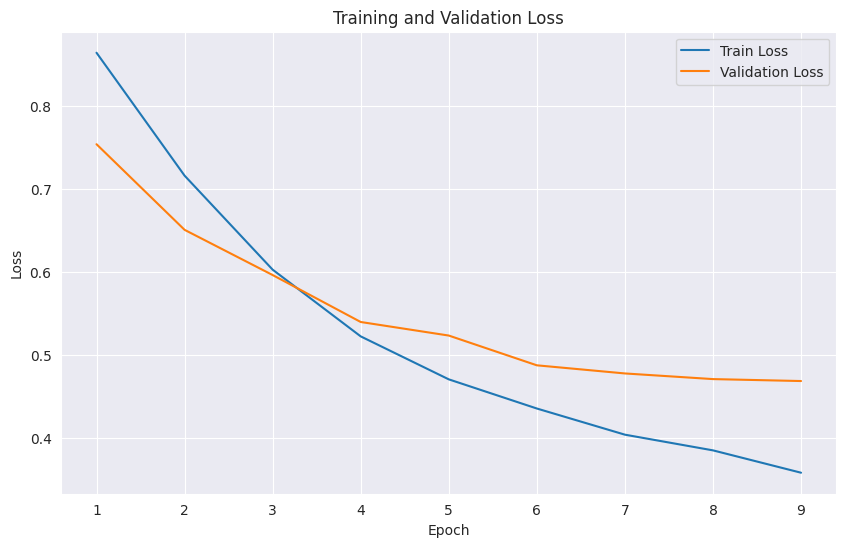

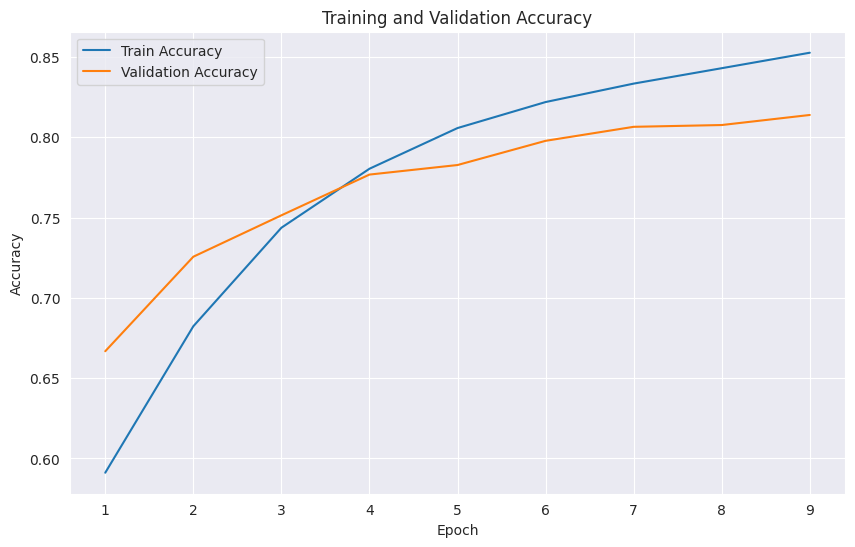

In [105]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### **Final Comparision**

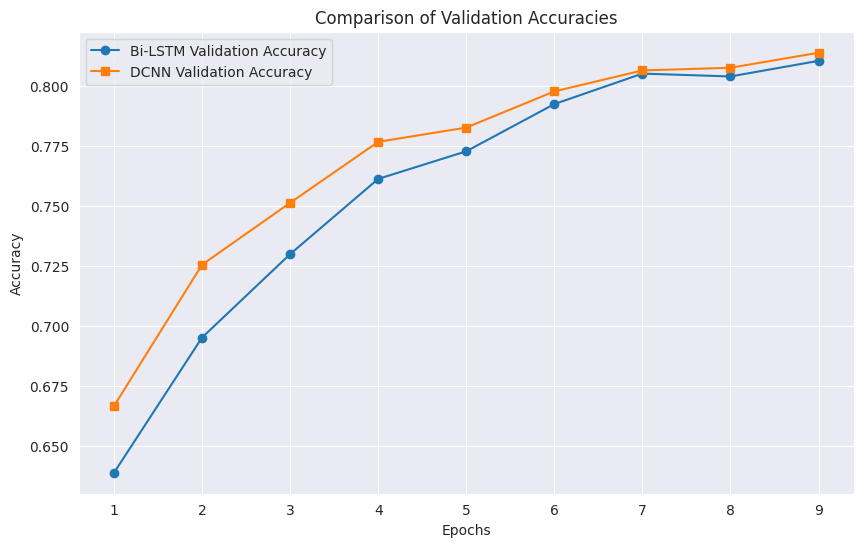

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), epoch_vl_acc, label='Bi-LSTM Validation Accuracy', marker='o')
plt.plot(range(1, epochs + 1), valid_accuracies, label='DCNN Validation Accuracy', marker='s')
plt.title('Comparison of Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()